In [1]:
import numpy as np
import pandas as pd

Try these things to understand data in more details

How many articles are there for Palestine and Microsoft each?

What is hour of publication for each article.

How many articles are there, where status of all social media platform is greater than zero? How many Microsoft and how many are Palestine.

How sentimentTitle and Sentiment headings are spread?

Try to summarize to article and headlines. (We'll discuss this in details in this week)

For each topic (microsoft and palestine), how many news article are present in their individual social media platform file. 

How are the data spread in separate file for each social media platform file for articles with Facebook/Googleplus/Linkedin values are -1.

How are the data spread in separate file for each social media platform file for articles with Facebook/Googleplus/Linkedin values are -1.

What meaning is coming out of Facebook/Googleplus/Linkedin columns with columns -1 and 0


In [2]:
#READING THE DATASET
news=pd.read_csv('News_Final.csv',encoding='latin-1')

In [3]:
news.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


# column description

In [4]:
# as our objective is to compare the popularity of palestine and microsoft we are taking the rows  of palestine and microsoft and creating a new dataframe for it
palestine=news[news['Topic']=='palestine']

In [5]:
microsoft=news[news['Topic']=='microsoft']

In [6]:
combined=pd.concat([palestine,microsoft],axis=0)

In [7]:
#as we can see there are null values in the headline and the source column
combined.isnull().sum()

IDLink                 0
Title                  0
Headline               4
Source               239
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [8]:
combined=combined.dropna()

In [9]:
combined.shape

(30458, 11)

In [10]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30458 entries, 8 to 93238
Data columns (total 11 columns):
IDLink               30458 non-null float64
Title                30458 non-null object
Headline             30458 non-null object
Source               30458 non-null object
Topic                30458 non-null object
PublishDate          30458 non-null object
SentimentTitle       30458 non-null float64
SentimentHeadline    30458 non-null float64
Facebook             30458 non-null int64
GooglePlus           30458 non-null int64
LinkedIn             30458 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 2.8+ MB


How many articles are there for Palestine and Microsoft each?


In [11]:
combined['Topic'].value_counts()

microsoft    21851
palestine     8607
Name: Topic, dtype: int64

In [12]:
#WE ARE CONVERTING THE OBJECT TYPE OF DATE TO DATETIME
combined['Date'] = pd.to_datetime(combined['PublishDate'])

What is hour of publication for each article.

In [13]:
def hr_func(ts):
    return ts.hour

combined['time_hour'] = combined['Date'].apply(hr_func)

In [14]:
combined.head(10)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Date,time_hour
8,80771.0,Fire claims more than 100-year-old barn in Han...,A Hancock County man lost a barn early Monday ...,WTHR Indianapolis,palestine,2015-03-01 01:20:00,-0.173925,-0.050185,-1,-1,-1,2015-03-01 01:20:00,1
140,70308.0,The British must formally ÂÂÂ and swiftly Â...,Forced evictions of Palestinian farmers from t...,The Guardian,palestine,2015-09-09 00:00:00,0.000000,0.104170,-1,-1,-1,2015-09-09 00:00:00,0
141,69864.0,Palestine flag to fly at UN headquarters after...,Palestine's flag will fly at UN headquarters a...,The Guardian,palestine,2015-09-10 00:00:00,0.024156,-0.355276,-1,-1,-1,2015-09-10 00:00:00,0
142,69866.0,The First-Ever Raising of Palestine's Flag at ...,"Tomorrow, the Palestinian flag will be raised ...",Huffington Post,palestine,2015-09-29 00:00:00,0.081857,0.194754,-1,-1,-1,2015-09-29 00:00:00,0
145,69978.0,Palestine: The Psychotic Stage,"As in this headline: """"""Palestinian Killed As ...",Wall Street Journal,palestine,2015-10-12 00:00:00,0.000000,-0.053572,-1,-1,-1,2015-10-12 00:00:00,0
146,70211.0,India offers $5 mn budgetary support to Palestine,President Pranab Mukherjee on Monday held talk...,The Hindu,palestine,2015-10-12 00:00:00,-0.188982,0.028677,-1,-1,-1,2015-10-12 00:00:00,0
165,70210.0,Free Palestine demonstrators protest outside I...,"Layla White, of London Palestine Action which ...",Daily Mail,palestine,2015-10-17 00:00:00,-0.114583,0.034793,-1,-1,-1,2015-10-17 00:00:00,0
193,62031.0,Palestine v Saudi Arabia goes ahead in Al-Ram ...,Palestine will host Saudi Arabia in a World Cu...,SkySports,palestine,2015-10-21 00:00:00,0.072169,-0.122176,-1,-1,-1,2015-10-21 00:00:00,0
194,62047.0,Israeli Palestinian conflict: Two viewpoints; ...,"Hebron, West Bank (CNN) The armed Israeli poli...",CNN,palestine,2015-10-21 00:00:00,-0.099437,-0.043015,-1,-1,-1,2015-10-21 00:00:00,0
195,62065.0,A Beginner's Guide To The Recent Outbreak Of F...,Understanding why there is so much tension and...,New Matilda,palestine,2015-10-21 00:00:00,-0.037689,-0.103041,-1,-1,-1,2015-10-21 00:00:00,0


In [15]:
articlesg0=combined.loc[((combined.Facebook > 0) & (combined.LinkedIn >0) &(combined.GooglePlus > 0)),:]

In [16]:
articlesg0

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Date,time_hour
3441,61979.0,Israel to Sweden: Don't Make the Paris Attacks...,But Swedish authorities didn't seem too concer...,Foreign Policy (blog),palestine,2015-11-18 00:00:00,0.120972,0.086031,201,2,1,2015-11-18 00:00:00,0
3445,61985.0,Is Palestine the answer?,"Margot Wallstr""""m told television network SVT2...",Middle East Monitor,palestine,2015-11-18 00:00:00,0.000000,-0.286707,456,1,1,2015-11-18 00:00:00,0
3886,62001.0,Israel Divides the Jews ÂÂÂ An Analysis by ...,Ahad Ha-am (the pen name of the famous Jewish ...,Intifada Palestine,palestine,2015-11-19 02:44:42,-0.166667,-0.003544,35,4,2,2015-11-19 02:44:42,2
4170,62516.0,5 Killed in Tel Aviv and West Bank by Palestin...,"JERUSALEM """""" Five people were killed on Thurs...",New York Times,palestine,2015-11-19 19:04:40,-0.039528,-0.106600,1925,21,9,2015-11-19 19:04:40,19
4189,61974.0,Israel is finally allowing Palestine to have 3G,One feature of Israel's control over Palestine...,Quartz,palestine,2015-11-19 19:44:41,-0.154680,0.054554,68,1,18,2015-11-19 19:44:41,19
4381,62434.0,ADL: American terror victim perished on 'blood...,A Palestinian who drove from the direction of ...,Jerusalem Post Israel News,palestine,2015-11-20 05:44:41,-0.168981,-0.153093,204,6,1,2015-11-20 05:44:41,5
4484,62476.0,Development in Palestine: Destined to fail bef...,Susiya village in the south Hebron hills of Pa...,The Guardian,palestine,2015-11-20 10:24:40,0.000000,-0.225037,96,2,3,2015-11-20 10:24:40,10
4504,62496.0,"TÂÂhe Child Ahmed Manasrah, Our Iconic Torture",The child Manasrah was an iconic sample of the...,Intifada Palestine,palestine,2015-11-20 11:34:40,-0.135038,-0.150000,27,1,13,2015-11-20 11:34:40,11
4560,62537.0,Wall Street Journal Publishes Israel's Leading...,"Yesterday, Israeli-Palestinian Knesset member ...",Intifada Palestine,palestine,2015-11-20 14:11:41,-0.049411,0.000000,44,3,5,2015-11-20 14:11:41,14
4822,62714.0,Israel closes down second Hebron radio station,Israeli forces raided and shut down a Palestin...,www.worldbulletin.net,palestine,2015-11-21 08:54:41,-0.114472,0.065756,1,31,2,2015-11-21 08:54:41,8


In [17]:
articlesg0['Topic'].value_counts()

microsoft    7084
palestine     736
Name: Topic, dtype: int64

How sentimentTitle and Sentiment headings are spread?

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

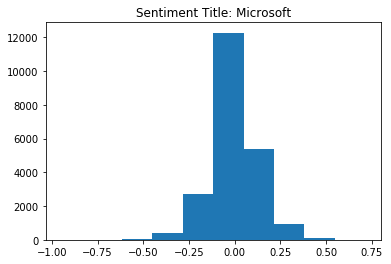

In [74]:



plt.title('Sentiment Title: Microsoft')
plt.hist(combined['SentimentTitle'][combined.Topic=='microsoft'])
plt.show()



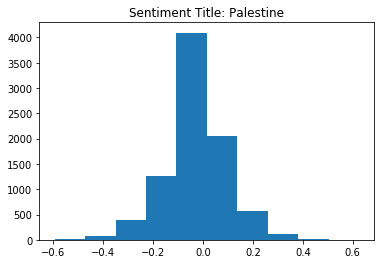

In [70]:
plt.title('Sentiment Title: Palestine')
plt.hist(combined['SentimentTitle'][combined.Topic=='palestine'])
plt.show()

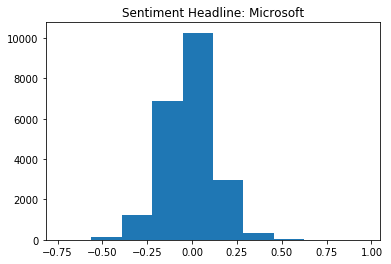

In [67]:
plt.title('Sentiment Headline: Microsoft')
plt.hist(combined['SentimentHeadline'][combined.Topic=='microsoft'])
plt.show()

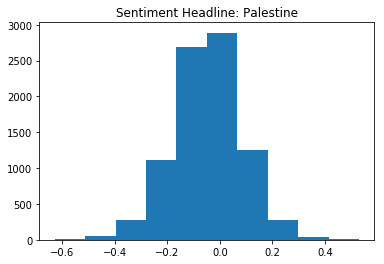

In [68]:
plt.title('Sentiment Headline: Palestine')
plt.hist(combined['SentimentHeadline'][combined.Topic=='palestine'])
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

In [21]:
import pandas as pd
import nltk
import numpy as np

In [22]:
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [23]:
combined['Headline']=combined['Headline'].astype('str')

In [24]:
headline=combined.Headline

In [25]:
values = ','.join(map(str, headline))

In [26]:
parser = PlaintextParser.from_string(values, Tokenizer("english"))

In [ ]:
summarizer = LexRankSummarizer()
sentences = summarizer(parser.document, 10)
sentences

In [ ]:

article=combined.Title

In [ ]:
values1 = '.'.join(map(str, article))

In [ ]:
parser = PlaintextParser.from_string(values1, Tokenizer("english"))

In [ ]:
summarizer = LexRankSummarizer()
sentences = summarizer(parser.document, 10)
sentences

For each topic (microsoft and palestine), how many news article are present in their individual social media platform file. 

In [ ]:
lpalestine=pd.read_csv('LinkedIn_Palestine.csv')

In [ ]:
lpalestine.shape

In [ ]:
lmicrosoft=pd.read_csv('LinkedIn_Microsoft.csv')

In [ ]:

lmicrosoft.shape

In [ ]:
gpalestine=pd.read_csv('GooglePlus_Palestine.csv')

In [ ]:
gpalestine.shape

In [ ]:

gmicrosoft=pd.read_csv('GooglePlus_Microsoft.csv')

In [ ]:
gmicrosoft.shape

In [ ]:
fpalestine=pd.read_csv('Facebook_Palestine.csv')

In [ ]:
fpalestine.shape

In [ ]:
fmicrosoft=pd.read_csv('Facebook_Microsoft.csv')

In [ ]:
fmicrosoft.shape

How are the data spread in separate file for each social media platform file for articles with Facebook/Googleplus/Linkedin values are -1.


In [ ]:
#WE ARE CREATING COLUMNS FOR MONTHE ,DATE,YEAR,MONTH_NAME,WEEKDAY
combined['month'] = combined['Date'].dt.month
combined['day'] = combined['Date'].dt.day
combined['year'] = combined['Date'].dt.year
combined['month_name'] = combined['Date'].dt.strftime('%b')
combined['weekday'] = combined['Date'].dt.strftime('%A')

In [ ]:
articlesl0=combined.loc[((combined.Facebook <=0) & (combined.LinkedIn<=0) &(combined.GooglePlus <= 0)),:]

In [ ]:
articlesl0.head()

In [ ]:
articlesl0.shape

In [ ]:
articlesl0['Topic'].value_counts()

In [ ]:
articlesg0['Topic'].value_counts()

In [ ]:
combined['Topic'].value_counts()

In [ ]:
articlesl0.time_hour.value_counts().head()

In [ ]:
articlesl0.time_hour[articlesl0['Topic']=='palestine'].value_counts().head()

In [ ]:
articlesl0.time_hour[articlesl0['Topic']=='microsoft'].value_counts().head()

In [ ]:
articlesl0.month[articlesl0['Topic']=='microsoft'].value_counts().head()

In [ ]:
articlesl0.month[articlesl0['Topic']=='palestine'].value_counts().head()

In [ ]:
articlesl0['month'].value_counts().head()

In [ ]:
sns.countplot(articlesl0['month'])
plt.show()

In [ ]:
articlesl0['day'].value_counts().head()

In [ ]:
articlesl0.day[articlesl0['Topic']=='palestine'].value_counts().head()

In [ ]:
articlesl0.day[articlesl0['Topic']=='microsoft'].value_counts().head()

In [ ]:
plt.hist(articlesl0['SentimentTitle'])
plt.show()

In [ ]:
plt.hist(articlesg0['SentimentTitle'])
plt.show()

In [ ]:
plt.hist(combined['SentimentTitle'])
plt.show()

In [ ]:
articlesl0['SentimentTitle'].skew()

In [ ]:
combined['SentimentTitle'].skew()

In [ ]:
articlesg0['SentimentTitle'].skew()

In [ ]:
articlesl0['Source'].value_counts()

In [ ]:
articlesg0['Source'].value_counts().head()

In [ ]:
combined['Source'].value_counts().head()